# IMDB Movie Review Classifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.3 MB/s 
     |████████████████████████████████| 101 kB 10.8 MB/s 
     |████████████████████████████████| 596 kB 45.2 MB/s 
     |████████████████████████████████| 6.6 MB 21.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install GPUtil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=806afbccf51405be29235dcf192c4283c91f3832ae5732c457c8f0c543839309
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [ ]:
# !pip install pyyaml==5.4.1

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # plot bar chart
import matplotlib.pyplot as plt
# import plotly.express as px
from wordcloud import WordCloud # plot wordcloud
import nltk # get stopwords
import string, re # string and regex manipulation
from bs4 import BeautifulSoup # parse HTML
from sklearn.feature_extraction.text import CountVectorizer
# import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score # splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer
import transformers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('omw-1.4')
# nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset/IMDB Dataset.csv')
# data = pd.read_csv('IMDB Dataset.csv')
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
TRAIN_SIZE = 0.7
TEST_SIZE = 0.3


In [ ]:
(data.isnull() | data.empty).sum()

review       0
sentiment    0
dtype: int64

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(data.shape)
data.head(10)




(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## Visualizations

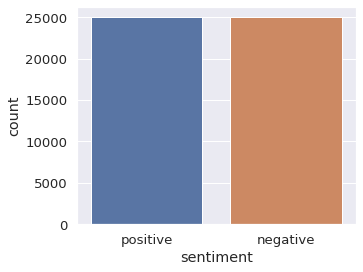

In [ ]:
sns.set(style = "darkgrid" , font_scale = 1.2)
plt.figure(figsize=(5,4))
sns.countplot(x='sentiment',data = data)

In [ ]:
from wordcloud import WordCloud
def makeWordCloud(bkColor, w, h, series, title, ax):
    wcl = WordCloud(background_color=bkColor,
                    width=w,
                    height=h).generate(" ".join(series))
    ax.imshow(wcl)
    ax.axis('off')
    ax.set_title(title, fontsize=40)

In [ ]:
def get_top_text_ngrams(words, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(words)
    bag_of_words = vec.transform(words)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Unprocessed

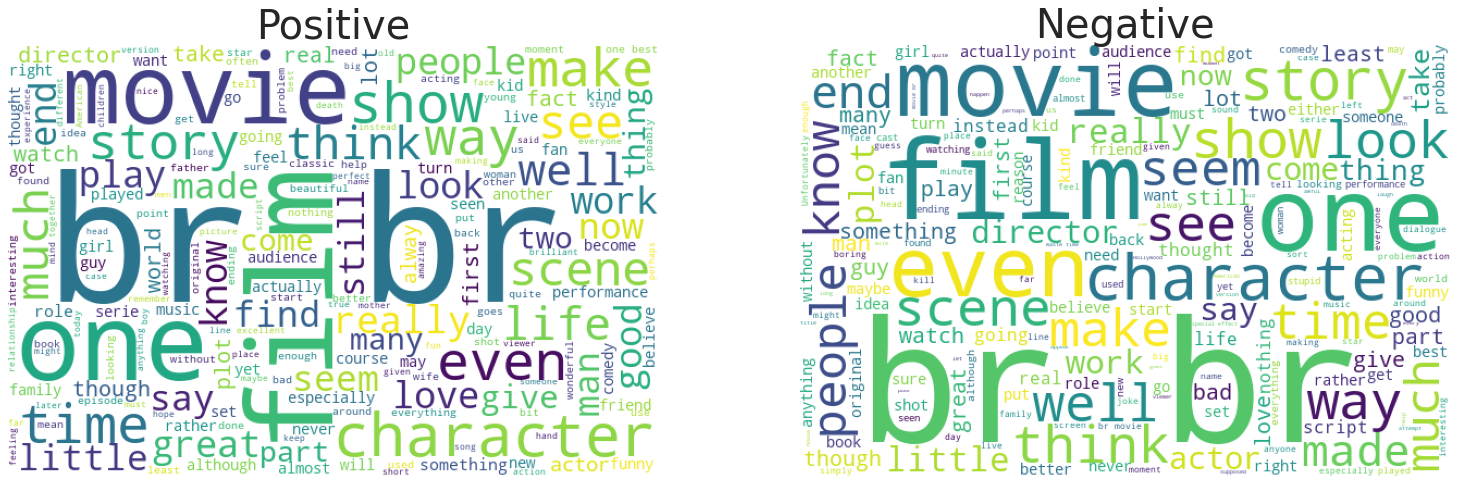

In [ ]:
positive = data[data['sentiment']=="positive"]['review']
negative = data[data['sentiment']=="negative"]['review']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
makeWordCloud("white", 600, 400, positive, "Positive", ax1)
makeWordCloud("white", 600, 400, negative, "Negative", ax2)
plt.show()

In [ ]:
most_common_uni = get_top_text_ngrams(data.review,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_bi = get_top_text_ngrams(data.review,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_tri = get_top_text_ngrams(data.review,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### Processed

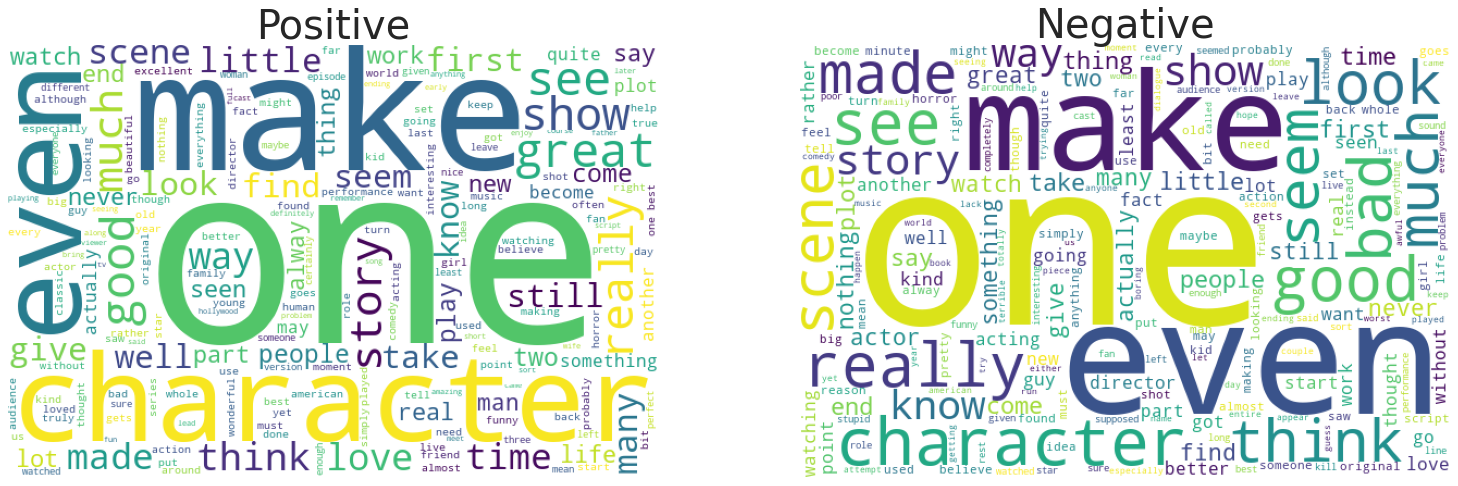

In [ ]:
positive = data[data['sentiment']=="positive"]['review']
negative = data[data['sentiment']=="negative"]['review']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
makeWordCloud("white", 600, 400, positive, "Positive", ax1)
makeWordCloud("white", 600, 400, negative, "Negative", ax2)
plt.show()

In [ ]:
most_common_uni = get_top_text_ngrams(data.review,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_bi = get_top_text_ngrams(data.review,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_common_tri = get_top_text_ngrams(data.review,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

## Data Processing

In [ ]:
data.sentiment.replace("positive" , 1 , inplace = True)
data.sentiment.replace("negative" , 0 , inplace = True)
data.head()
preprocess = data.copy()


In [ ]:
lemmatizer = WordNetLemmatizer()
# stop = stopwords.words('english')

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    text = re.sub('[^\w\s]', '', text)
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

def lemmatize(text):
    text = [lemmatizer.lemmatize(word=word, pos='v') for word in text]
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)
#Removing film & movie
data["review"] = data["review"].str.replace("movie", "")
data["review"] = data["review"].str.replace("film", "")


## Training Model

### Splitting

In [ ]:
# stratify for a balanced split

x, y = data.iloc[:, :-1], data.iloc[:, [-1]]  # split feature and label
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.7, test_size=0.3, stratify=data.sentiment)
x_validate, x_test, y_validate, y_test = train_test_split(x_rem, y_rem, train_size=1/3, test_size=2/3,stratify=y_rem)



In [ ]:
x_preprocess, y_preprocess = preprocess.iloc[:, :-1], preprocess.iloc[:, [-1]]  # split feature and label
x_train_preprocess, x_rem_preprocess, y_train_preprocess, y_rem_preprocess = train_test_split(x_preprocess,y_preprocess, train_size=0.7, test_size=0.3, stratify=preprocess.sentiment)
x_validate_preprocess, x_test_preprocess, y_validate_preprocess, y_test_preprocess = train_test_split(x_rem_preprocess, y_rem_preprocess, train_size=1/3, test_size=2/3,stratify=y_rem_preprocess)



### Functions

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer
from torch import nn
from transformers import BertModel
from torch.optim import Adam
from tqdm import tqdm

In [ ]:
## Globals 
train_accuracy = []
val_accuarcy = []

train_loss = []
val_loss = []

train_accuracy_compare = []
val_accuarcy_compare = []

train_loss_compare = []
val_loss_compare = []

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased') # initialize bertTokenizer (english language base)

class Dataset(torch.utils.data.Dataset):

    def __init__(self, x,y):

        # Map categoory to id representation
        # self.labels = [labels[label] for label in y['sentiment']]
        self.labels =  torch.FloatTensor(y['sentiment'].values)
        # Tokenize text into BERT input format
        self.texts = [tokenizer(review, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for review in x['review']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class BertClassifier(nn.Module): # Base Class Neural Network

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout) # Dropout activation
        self.relu = nn.ReLU() # Relu activation
        self.sigmoid = nn.Sigmoid() # Sigmoid activation
        # self.linear = nn.Linear(768, 5)
        self.layer1 = nn.Linear(768,512)
        self.layer2 = nn.Linear(512,256)
        self.layer3 = nn.Linear(256,128)
        self.layer4 = nn.Linear(128,64)
        self.layerFinal = nn.Linear(64,1)
        
        

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False) # use embedded vector
        dropout_output = self.dropout(pooled_output)
        # linear_output = self.linear(dropout_output)
        first_layer = self.layer1(dropout_output)
        first_layer = self.relu(first_layer)
        first_layer = self.dropout(first_layer)

        second_layer = self.layer2(first_layer)
        second_layer = self.relu(second_layer)
        second_layer = self.dropout(second_layer)

        third_layer = self.layer3(second_layer)
        third_layer = self.relu(third_layer)
        third_layer = self.dropout(third_layer)

        fourth_layer = self.layer4(third_layer)
        fourth_layer = self.relu(fourth_layer)
        fourth_layer = self.dropout(fourth_layer)

        final_layer = self.layerFinal(fourth_layer)
        final_layer = self.sigmoid(final_layer)

        return final_layer

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
def train(model, train_dataloader, val_dataloader, learning_rate, epochs):
    global train_accuracy,val_accuarcy,train_loss,val_loss
    # train, val = Dataset(train_data, train_data_y), Dataset(val_data, val_data_y) # Apply Dataset Class to set Labels and tokenize

    # # Make Dataset Iterable
    # train_dataloader = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True) #set how many records are processed in each batch
    # val_dataloader = torch.utils.data.DataLoader(val, batch_size=16)

    use_cuda = torch.cuda.is_available() # use cuda for faster GPU computation
    device = torch.device("cuda" if use_cuda else "cpu") # use GPU if available

    criterion = nn.BCELoss() # Binary cross entropy loss
    optimizer = Adam(model.parameters(), lr= learning_rate) # initialize Adam Optimizer (optimized gradient descent handling sparse gradients)

    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=2, verbose=True)

    if use_cuda:
            # Activate if GPU used
            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            # Initialize to zero at start of epoch
            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader): # show progress bar

                train_label = train_label.to(device) # send label to approriate device (CPU/GPU)
                mask = train_input['attention_mask'].to(device) # prevent looking at padding
                input_id = train_input['input_ids'].squeeze(1).to(device) # squeeze to remove ones

                output = model(input_id, mask) # input to model
                # calculate the loss
                batch_loss = criterion(output, train_label.unsqueeze(1))#
                total_loss_train += batch_loss.item()
                output      = (output >0.5).float()
                train_label = train_label.unsqueeze(1)
                
                acc = (output == train_label).sum().item() # match the output  with real data
                total_acc_train += acc

                # Set gradients of all models to zero to clear the gradients of loss of all optimized variables
                model.zero_grad() 
                # backward pass: compute gradient of the loss with respect to model parameters
                batch_loss.backward() 
                # perform a single optimization step (parameter update) simultaneously update internally stored gradients
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad(): # detach tensors from graph

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)
                    # calculate the loss
                    batch_loss = criterion(output, val_label.unsqueeze(1))
                    total_loss_val += batch_loss.item()

                    output      = (output >0.5).float()
                    val_label = val_label.unsqueeze(1)
                    
                    acc = (output == val_label).sum().item()
                    total_acc_val += acc
            
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_dataloader.dataset): .3f} \
                | Train Accuracy: {total_acc_train / len(train_dataloader.dataset): .3f} \
                | Val Loss: {total_loss_val / len(val_dataloader.dataset): .3f} \
                | Val Accuracy: {total_acc_val / len(val_dataloader.dataset): .3f}')
            
            train_accuracy.append( total_acc_train/len(train_dataloader.dataset))
            val_accuarcy.append( total_acc_val/len(val_dataloader.dataset) )
            train_loss.append( total_loss_train/len(train_dataloader.dataset))
            val_loss.append( total_loss_val/len(val_dataloader.dataset))

            # early_stopping needs the validation loss to check if it has decresed, 
            # and if it has, it will make a checkpoint of the current model
            checkpoint_val_loss = total_loss_val / len(val_dataloader.dataset)
            early_stopping(checkpoint_val_loss, model)
            
            if early_stopping.early_stop:
                print("Early stopping")
                break
    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))





### Training

In [ ]:
train_df, val_df, test_df = Dataset(x_train, y_train), Dataset(x_validate, y_validate), Dataset(x_test, y_test)
train_dataloader = torch.utils.data.DataLoader(train_df, batch_size=16, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_df, batch_size=16)
test_dataloader = torch.utils.data.DataLoader(test_df, batch_size=16)

In [ ]:
train_df_preprocess, val_df_preprocess, test_df_preprocess = Dataset(x_train_preprocess[:10000],y_train_preprocess[:10000]), Dataset(x_validate_preprocess[:1500],y_validate_preprocess[:1500]), Dataset(x_test_preprocess,y_test_preprocess)
train_dataloader_preprocess = torch.utils.data.DataLoader(train_df_preprocess, batch_size=16, shuffle=True)
val_dataloader_preprocess = torch.utils.data.DataLoader(val_df_preprocess, batch_size=16)
test_dataloader_preprocess = torch.utils.data.DataLoader(test_df_preprocess, batch_size=16)

In [ ]:
import pickle 
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import os


# # prepare cross validation
# n=5
# kf = KFold(n_splits=n, random_state=seed, shuffle=True)

# LR = [0.0001,0.0005,0.001, 0.005]
# LR = [0.001]
# lr_val_score = []

model = None
def tune_LR(type, LR, tr_dataloader, v_dataloader,EPOCHS):
  global train_accuracy,val_accuarcy,train_loss,val_loss
  for lr in LR:
      for _ in range(0,1000):
          gc.collect() # delete unwanted objects
          torch.cuda.empty_cache() # release unoccupied cached memory

      train_accuracy = []
      val_accuarcy = []
      train_loss = []
      val_loss = []

      model = BertClassifier()
      PATH = f'./models/{type}/model_'+str(lr)
      try:
        os.makedirs(PATH)
      except:
        pass

      train(model,tr_dataloader, v_dataloader, lr, EPOCHS)
      torch.save(model, f'{PATH}/model_{lr}.pth')

      with open(f'{PATH}/train_accuracy_{lr}','wb') as f: 
          pickle.dump( np.array(train_accuracy), f)

      with open(f'{PATH}/val_accuarcy_{lr}','wb') as f: 
          pickle.dump( np.array(val_accuarcy), f)

      with open(f'{PATH}/train_loss_{lr}','wb') as f: 
          pickle.dump( np.array(train_loss), f)

      with open(f'{PATH}/val_loss_{lr}','wb') as f: 
          pickle.dump( np.array(val_loss), f)
      
      epochs  =  [i for i in range(0,len(val_loss))]
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.suptitle(f'Model lr = {lr} plot')
      ax1.plot(epochs, val_loss,'g',epochs,train_loss,'b')
      ax2.plot(epochs,val_accuarcy,'g',epochs,train_accuracy,'b')
      plt.savefig(f'{PATH}/model_graph_'+str(lr)+".png")
# plt.ylabel("Val Score")
# plt.xlabel("LR") 
# plt.plot(np.array(LR), np.array(lr_val_score))
# plt.show()

### Building

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2188/2188 [48:05<00:00,  1.32s/it]


Epochs: 1 | Train Loss:  0.043                 | Train Accuracy:  0.500                 | Val Loss:  0.043                 | Val Accuracy:  0.498
Validation loss decreased (inf --> 0.043395).  Saving model ...


100%|██████████| 2188/2188 [47:29<00:00,  1.30s/it]


Epochs: 2 | Train Loss:  0.043                 | Train Accuracy:  0.501                 | Val Loss:  0.043                 | Val Accuracy:  0.497
Validation loss decreased (0.043395 --> 0.043389).  Saving model ...


100%|██████████| 2188/2188 [47:52<00:00,  1.31s/it]


Epochs: 3 | Train Loss:  0.043                 | Train Accuracy:  0.496                 | Val Loss:  0.043                 | Val Accuracy:  0.501
EarlyStopping counter: 1 out of 1
Early stopping


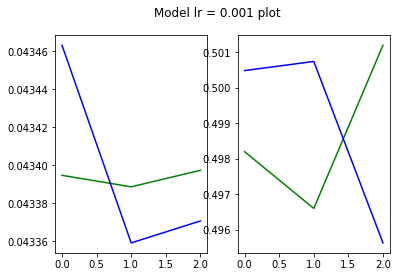

In [ ]:
# LR = [0.0001,0.0005,0.001, 0.005]
LR = [0.001]
EPOCHS = 5
tune_LR('Processed',LR,train_dataloader, val_dataloader, EPOCHS)


100%|██████████| 2188/2188 [51:15<00:00,  1.41s/it]


Epochs: 6 | Train Loss:  0.005                 | Train Accuracy:  0.983                 | Val Loss:  0.027                 | Val Accuracy:  0.873
EarlyStopping counter: 2 out of 2
Early stopping
'/content/models/Processed' -> '/content/drive/MyDrive/Models/Processed'
'/content/models/Processed/model_1e-05' -> '/content/drive/MyDrive/Models/Processed/model_1e-05'
'/content/models/Processed/model_1e-05/model_1e-05.pth' -> '/content/drive/MyDrive/Models/Processed/model_1e-05/model_1e-05.pth'
'/content/models/Processed/model_1e-05/train_accuracy_1e-05' -> '/content/drive/MyDrive/Models/Processed/model_1e-05/train_accuracy_1e-05'
'/content/models/Processed/model_1e-05/val_accuarcy_1e-05' -> '/content/drive/MyDrive/Models/Processed/model_1e-05/val_accuarcy_1e-05'
'/content/models/Processed/model_1e-05/train_loss_1e-05' -> '/content/drive/MyDrive/Models/Processed/model_1e-05/train_loss_1e-05'
'/content/models/Processed/model_1e-05/val_loss_1e-05' -> '/content/drive/MyDrive/Models/Processed/mo

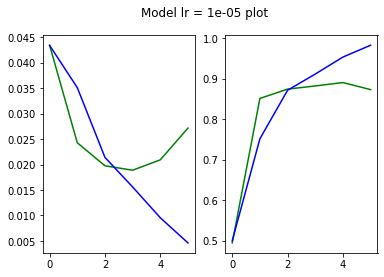

In [ ]:
# LR = [0.0001,0.0005,0.001, 0.005]
LR = [0.00001]
EPOCHS = 10
tune_LR('Processed',LR,train_dataloader, val_dataloader, EPOCHS)
%cp -av "/content/models/Processed" "/content/drive/MyDrive/Models"

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2188/2188 [54:45<00:00,  1.50s/it]


Epochs: 1 | Train Loss:  0.034                 | Train Accuracy:  0.704                 | Val Loss:  0.016                 | Val Accuracy:  0.914
Validation loss decreased (inf --> 0.015801).  Saving model ...


100%|██████████| 2188/2188 [54:46<00:00,  1.50s/it]


Epochs: 2 | Train Loss:  0.013                 | Train Accuracy:  0.933                 | Val Loss:  0.013                 | Val Accuracy:  0.933
Validation loss decreased (0.015801 --> 0.012648).  Saving model ...


100%|██████████| 2188/2188 [54:45<00:00,  1.50s/it]


Epochs: 3 | Train Loss:  0.006                 | Train Accuracy:  0.973                 | Val Loss:  0.013                 | Val Accuracy:  0.932
EarlyStopping counter: 1 out of 2


100%|██████████| 2188/2188 [54:39<00:00,  1.50s/it]


Epochs: 4 | Train Loss:  0.003                 | Train Accuracy:  0.989                 | Val Loss:  0.020                 | Val Accuracy:  0.928
EarlyStopping counter: 2 out of 2
Early stopping
'/content/models/UnProcessed' -> '/content/drive/MyDrive/Models/UnProcessed'
'/content/models/UnProcessed/model_1e-05' -> '/content/drive/MyDrive/Models/UnProcessed/model_1e-05'
'/content/models/UnProcessed/model_1e-05/model_1e-05.pth' -> '/content/drive/MyDrive/Models/UnProcessed/model_1e-05/model_1e-05.pth'
'/content/models/UnProcessed/model_1e-05/train_accuracy_1e-05' -> '/content/drive/MyDrive/Models/UnProcessed/model_1e-05/train_accuracy_1e-05'
'/content/models/UnProcessed/model_1e-05/val_accuarcy_1e-05' -> '/content/drive/MyDrive/Models/UnProcessed/model_1e-05/val_accuarcy_1e-05'
'/content/models/UnProcessed/model_1e-05/train_loss_1e-05' -> '/content/drive/MyDrive/Models/UnProcessed/model_1e-05/train_loss_1e-05'
'/content/models/UnProcessed/model_1e-05/val_loss_1e-05' -> '/content/drive/M

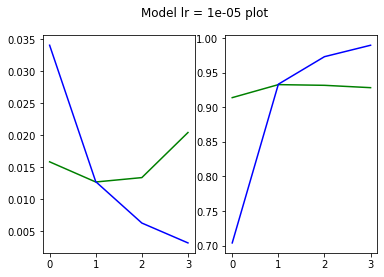

In [ ]:
# LR = [0.0001,0.0005,0.001, 0.005]
LR = [0.00001]
EPOCHS = 10
tune_LR('UnProcessed',LR,train_dataloader_preprocess, val_dataloader_preprocess, EPOCHS)
%cp -av "/content/models/UnProcessed" "/content/drive/MyDrive/Models"

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2188/2188 [48:52<00:00,  1.34s/it]


Epochs: 1 | Train Loss:  0.043                 | Train Accuracy:  0.500                 | Val Loss:  0.043                 | Val Accuracy:  0.506
Validation loss decreased (inf --> 0.043399).  Saving model ...


100%|██████████| 2188/2188 [48:44<00:00,  1.34s/it]


Epochs: 2 | Train Loss:  0.043                 | Train Accuracy:  0.499                 | Val Loss:  0.043                 | Val Accuracy:  0.489
EarlyStopping counter: 1 out of 2


100%|██████████| 2188/2188 [48:50<00:00,  1.34s/it]


Epochs: 3 | Train Loss:  0.043                 | Train Accuracy:  0.501                 | Val Loss:  0.043                 | Val Accuracy:  0.501
EarlyStopping counter: 2 out of 2
Early stopping
'/content/models/Processed' -> '/content/drive/MyDrive/Models/Processed'
'/content/models/Processed/model_0.001' -> '/content/drive/MyDrive/Models/Processed/model_0.001'
'/content/models/Processed/model_0.001/model_0.001.pth' -> '/content/drive/MyDrive/Models/Processed/model_0.001/model_0.001.pth'
'/content/models/Processed/model_0.001/train_accuracy_0.001' -> '/content/drive/MyDrive/Models/Processed/model_0.001/train_accuracy_0.001'
'/content/models/Processed/model_0.001/val_accuarcy_0.001' -> '/content/drive/MyDrive/Models/Processed/model_0.001/val_accuarcy_0.001'
'/content/models/Processed/model_0.001/train_loss_0.001' -> '/content/drive/MyDrive/Models/Processed/model_0.001/train_loss_0.001'
'/content/models/Processed/model_0.001/val_loss_0.001' -> '/content/drive/MyDrive/Models/Processed/mo

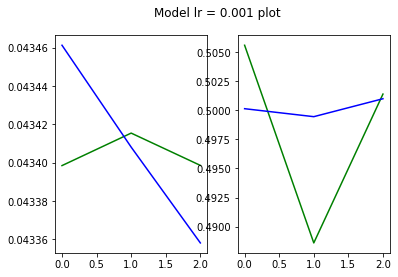

In [ ]:
# LR = [0.0001,0.0005,0.001, 0.005]
LR = [0.001]
EPOCHS = 10
tune_LR('Processed',LR,train_dataloader, val_dataloader, EPOCHS)
%cp -av "/content/models/Processed" "/content/drive/MyDrive/Models"

In [ ]:
# LR = [0.0001,0.0005,0.001, 0.005]
LR = [0.000001]
EPOCHS = 10
tune_LR('UnProcessed',LR,train_dataloader_preprocess, val_dataloader_preprocess, EPOCHS)
%cp -av "/content/models/UnProcessed" "/content/drive/MyDrive/Models3"

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 625/625 [15:17<00:00,  1.47s/it]


Epochs: 1 | Train Loss:  0.043                 | Train Accuracy:  0.492                 | Val Loss:  0.043                 | Val Accuracy:  0.507
Validation loss decreased (inf --> 0.043407).  Saving model ...


100%|██████████| 625/625 [15:16<00:00,  1.47s/it]


Epochs: 2 | Train Loss:  0.043                 | Train Accuracy:  0.505                 | Val Loss:  0.043                 | Val Accuracy:  0.504
EarlyStopping counter: 1 out of 2


100%|██████████| 625/625 [15:16<00:00,  1.47s/it]


Epochs: 3 | Train Loss:  0.043                 | Train Accuracy:  0.519                 | Val Loss:  0.043                 | Val Accuracy:  0.503
Validation loss decreased (0.043407 --> 0.043324).  Saving model ...


100%|██████████| 625/625 [15:16<00:00,  1.47s/it]


Epochs: 4 | Train Loss:  0.043                 | Train Accuracy:  0.565                 | Val Loss:  0.043                 | Val Accuracy:  0.601
Validation loss decreased (0.043324 --> 0.042771).  Saving model ...


100%|██████████| 625/625 [15:17<00:00,  1.47s/it]


Epochs: 5 | Train Loss:  0.042                 | Train Accuracy:  0.648                 | Val Loss:  0.042                 | Val Accuracy:  0.685
Validation loss decreased (0.042771 --> 0.042198).  Saving model ...


 59%|█████▉    | 369/625 [09:01<06:16,  1.47s/it]

### Manual Saving

cp: cannot stat '/content/models/UnProcessed': No such file or directory


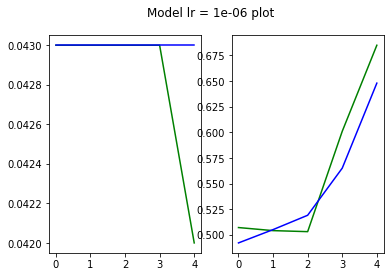

In [ ]:
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np

lr = 0.000001
type = "Unprocessed"
PATH = f'./models/{type}/model_'+str(lr)
try:
  os.makedirs(PATH)
except:
  pass
train_accuracy = [0.492, 0.505, 0.519, 0.565, 0.648]
val_accuarcy = [0.507, 0.504, 0.503, 0.601, 0.685]
train_loss = [0.043, 0.043, 0.043, 0.043, 0.043]
val_loss = [0.043, 0.043, 0.043, 0.043, 0.042]
epochs = 5

with open(f'{PATH}/train_accuracy_{lr}','wb') as f: 
    pickle.dump( np.array([0.492, 0.505, 0.519, 0.565, 0.648]), f)

with open(f'{PATH}/val_accuarcy_{lr}','wb') as f: 
    pickle.dump( np.array([0.507, 0.504, 0.503, 0.601, 0.685]), f)

with open(f'{PATH}/train_loss_{lr}','wb') as f: 
    pickle.dump( np.array([0.043, 0.043, 0.043, 0.043, 0.043]), f)

with open(f'{PATH}/val_loss_{lr}','wb') as f: 
    pickle.dump( np.array([0.043, 0.043, 0.043, 0.043, 0.042]), f)

epochs  =  [i for i in range(0,len(val_loss))]
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f'Model lr = {lr} plot')
ax1.plot(epochs, val_loss,'g',epochs,train_loss,'b')
ax2.plot(epochs,val_accuarcy,'g',epochs,train_accuracy,'b')
plt.savefig(f'{PATH}/model_graph_'+str(lr)+".png")

%cp -av "/content/models/UnProcessed" "/content/drive/MyDrive/Models4"

### Pruning

**Weight pruning**<br>
In **weight pruning**, we prune away k% of weights.<br>
For this, I have used the percentile function in numpy to get the kth smallest value in the weight. For all values in weight smaller than k, their weight will be set to zero. Also, we have to make sure that we don't affect the original model. For that purpose, I have used the copy module's deepcopy function to copy the model weights.

We don't have to prune the weights for the last output layer. That is why, I have used i<length-2 because the length-2 parameter corresponds to the weight for the last layer.

#### Loading

In [ ]:
best_model_processed = torch.load('/content/drive/MyDrive/Models/Processed/Processed_1e-05/model_1e-05.pth')
best_model_preprocessed = torch.load('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-05/model_1e-05.pth')

In [ ]:
best_accuracy_processed = evaluate(best_model_processed, x_test, y_test)

Confusion Matrix : 
[[4541  459]
 [ 264 4736]]
Precision = 0.911646
Sensitivity = 0.9472
Specificity = 0.9082
F score = 0.929083
Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5000
           1       0.91      0.95      0.93      5000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Test Accuracy:  0.928


In [ ]:
import copy
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
def weight_prune(mymodel, pruning_percentage, xTest, yTest):
    model1 = copy.deepcopy(mymodel)
    length = len(list(model1.parameters()))
    for i, param in enumerate(model1.parameters()):
        if len(param.size())!=1 and i<length-2:
            weight = param.detach().cpu().numpy()
            weight[np.abs(weight)<np.percentile(np.abs(weight), pruning_percentage)] = 0
            weight = torch.from_numpy(weight).to(device)
            param.data = weight
    return evaluate(model1, xTest, yTest), model1

#### Prune

In [ ]:
pruning_percent = [0, 20, 40, 60, 80, 90, 99]
accuracy_weight_pruning = []
for percent in pruning_percent:
    accuracy_weight_pruning.append(weight_prune(best_model_processed, percent, x_test, y_test))

Confusion Matrix : 
[[4545  455]
 [ 256 4744]]
Precision = 0.912483
Sensitivity = 0.9488
Specificity = 0.909
F score = 0.930287
Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      5000
           1       0.91      0.95      0.93      5000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Test Accuracy:  0.929
Confusion Matrix : 
[[4599  401]
 [ 311 4689]]
Precision = 0.921218
Sensitivity = 0.9378
Specificity = 0.9198
F score = 0.929435
Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      5000
           1       0.92      0.94      0.93      5000

    accuracy                           0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[   0 5000]
 [   0 5000]]
Precision = 0.5
Sensitivity = 1.0
Specificity = 0.0
F score = 0.666667
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.50      1.00      0.67      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Test Accuracy:  0.500


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix : 
[[   0 5000]
 [   0 5000]]
Precision = 0.5
Sensitivity = 1.0
Specificity = 0.0
F score = 0.666667
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.50      1.00      0.67      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Test Accuracy:  0.500


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


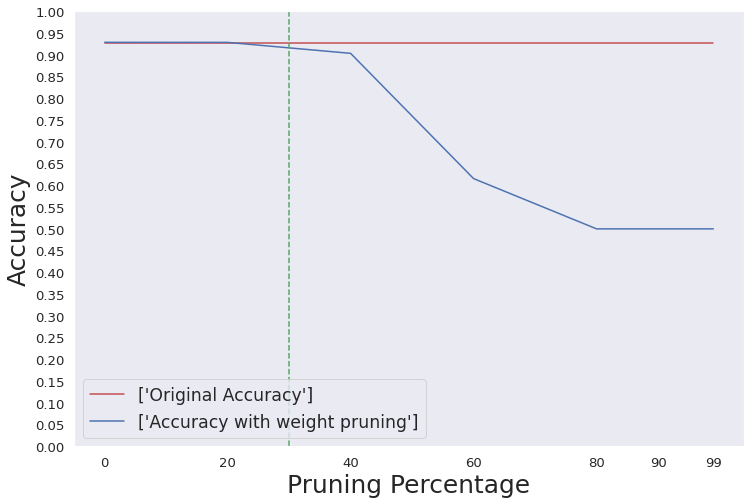

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8
plt.plot(pruning_percent, np.size(pruning_percent)*[best_accuracy_processed], 'r',
         pruning_percent, accuracy_weight_pruning, 'b')
plt.legend([['Original Accuracy'], 
            ['Accuracy with weight pruning']],
           loc='lower left', fontsize='large')
plt.xlabel('Pruning Percentage', fontsize='xx-large')
plt.ylabel('Accuracy', fontsize='xx-large')
plt.xticks(pruning_percent)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.axvline(x = 30, color = 'g', linestyle='dashed')
plt.grid()
plt.show()

In [ ]:
best_accuracy_preprocessed = evaluate(best_model_preprocessed, x_test_preprocess, y_test_preprocess)

[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0,

In [ ]:
pruning_percent = [0, 20, 40, 60, 80, 90, 99]
accuracy_weight_pruning = []
for percent in pruning_percent:
    accuracy_weight_pruning.append(weight_prune(best_model_preprocessed, percent, x_test_preprocess, y_test_preprocess))

[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0,

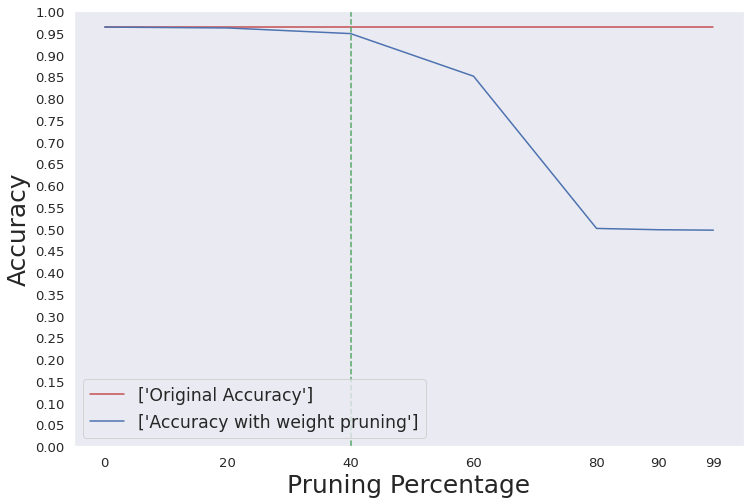

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8
plt.plot(pruning_percent, np.size(pruning_percent)*[best_accuracy_preprocessed], 'r',
         pruning_percent, accuracy_weight_pruning, 'b')
plt.legend([['Original Accuracy'], 
            ['Accuracy with weight pruning']],
           loc='lower left', fontsize='large')
plt.xlabel('Pruning Percentage', fontsize='xx-large')
plt.ylabel('Accuracy', fontsize='xx-large')
plt.xticks(pruning_percent)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.axvline(x = 40, color = 'g', linestyle='dashed')
plt.grid()
plt.show()

#### Save

In [ ]:
percent = 30
_,best_pruned_model_processed = weight_prune(best_model_processed, percent, x_test, y_test)

Confusion Matrix : 
[[4510  490]
 [ 283 4717]]
Precision = 0.905896
Sensitivity = 0.9434
Specificity = 0.902
F score = 0.924268
Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      5000
           1       0.91      0.94      0.92      5000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Test Accuracy:  0.923


In [ ]:
percent = 30
_,best_pruned_model_preprocessed = weight_prune(best_model_preprocessed, percent, x_test_preprocess, y_test_preprocess)

Confusion Matrix : 
[[4714  286]
 [ 176 4824]]
Precision = 0.944031
Sensitivity = 0.9648
Specificity = 0.9428
F score = 0.954303
Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      5000
           1       0.94      0.96      0.95      5000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Test Accuracy:  0.954


In [ ]:
torch.save(best_pruned_model_preprocessed, '/content/models/best_pruned_model_preprocessed.pth')
torch.save(best_pruned_model_processed, '/content/models/best_pruned_model_processed.pth')

In [ ]:
%cp -av "/content/models/best_pruned_model_preprocessed.pth" "/content/drive/MyDrive/Models/Pruned"
%cp -av "/content/models/best_pruned_model_processed.pth" "/content/drive/MyDrive/Models/Pruned"

'/content/models/best_pruned_model_preprocessed.pth' -> '/content/drive/MyDrive/Models/Pruned/best_pruned_model_preprocessed.pth'
'/content/models/best_pruned_model_processed.pth' -> '/content/drive/MyDrive/Models/Pruned/best_pruned_model_processed.pth'


#### Comparison

In [ ]:
test_score_unprocessed = evalute(best_model_preprocessed, x_test_preprocess, y_test_preprocess)
test_score_pruned_unprocessed = evalute(best_prune_model_preprocessed, x_test_preprocess, y_test_preprocess)
test_score_processed = evalute(best_model_processed, x_test, y_test)
test_score_pruned_processed = evalute(best_prune_model_processed, x_test, y_test)

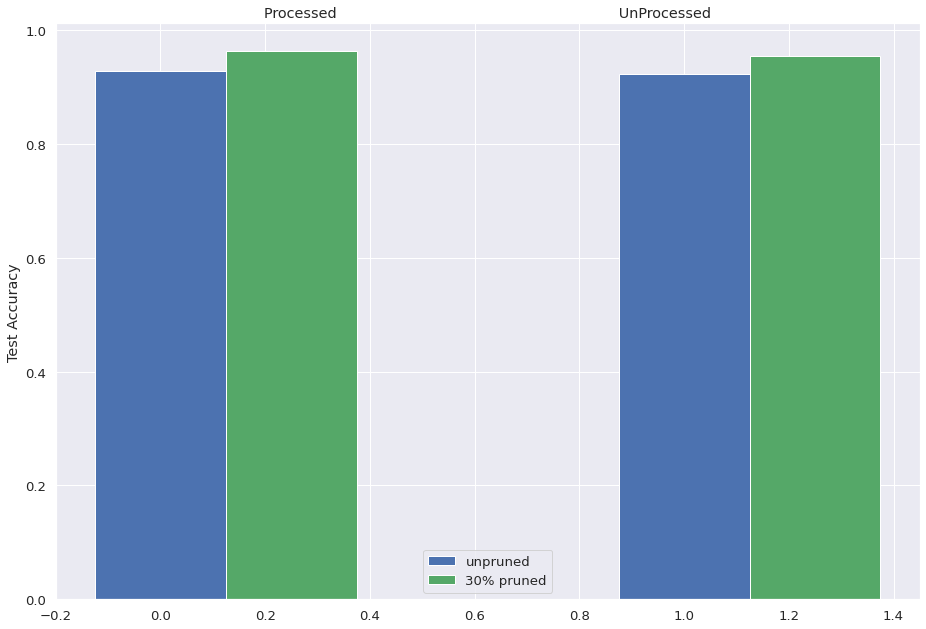

In [ ]:
data = [[test_score_processed,test_score_pruned_processed],
[test_score_unprocessed, test_score_pruned_unprocessed]]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.title('Processed                                                             UnProcessed')
plt.ylabel('Test Accuracy')
plt.legend(['unpruned', '30% pruned'])


## Learning Rates

### Processed

#### Globals

In [ ]:
LRrate_processed = []
train_accuracy_processed = []
val_accuracy_processed = []
train_loss_processed = []
val_loss_processed = []

#### Models

In [ ]:
## 0.000001
LRrate_processed.append(0.000001)
train_accuracy_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_1e-06/train_accuarcy_1e-06',"rb"))[-2])
val_accuracy_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_1e-06/val_accuarcy_1e-06',"rb"))[-2])
train_loss_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_1e-06/train_loss_1e-06',"rb"))[-2])
val_loss_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_1e-06/val_loss_1e-06',"rb"))[-2])

## 0.000005
LRrate_processed.append(0.000005)
train_accuracy_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_5e-06/train_accuarcy_5e-06',"rb"))[-2])
val_accuracy_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_5e-06/val_accuarcy_5e-06',"rb"))[-2])
train_loss_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_5e-06/train_loss_5e-06',"rb"))[-2])
val_loss_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_5e-06/val_loss_5e-06',"rb"))[-2])

## 0.00001
LRrate_processed.append(0.00001)
train_accuracy_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_1e-05/train_accuracy_1e-05',"rb"))[-2])
val_accuracy_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_1e-05/val_accuarcy_1e-05',"rb"))[-2])
train_loss_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_1e-05/train_loss_1e-05',"rb"))[-2])
val_loss_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_1e-05/val_loss_1e-05',"rb"))[-2])

## 0.00005
LRrate_processed.append(0.00005)
train_accuracy_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_5e-05/train_accuarcy_5e-05',"rb"))[-2])
val_accuracy_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_5e-05/val_accuarcy_5e-05',"rb"))[-2])
train_loss_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_5e-05/train_loss_5e-05',"rb"))[-2])
val_loss_processed.append(pickle.load(open('/content/drive/MyDrive/Models/Processed/Processed_5e-05/val_loss_5e-05',"rb"))[-2])


### UnProcessed

#### Globals

In [ ]:
LRrate_unprocessed = []
train_accuracy_unprocessed = []
val_accuracy_unprocessed = []
train_loss_unprocessed = []
val_loss_unprocessed = []

#### Models

In [ ]:
## 0.000001
LRrate_unprocessed.append(0.000001)
train_accuracy_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-06/train_accuracy_1e-06',"rb"))[-2])
val_accuracy_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-06/val_accuarcy_1e-06',"rb"))[-2])
train_loss_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-06/train_loss_1e-06',"rb"))[-2])
val_loss_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-06/val_loss_1e-06',"rb"))[-2])

## 0.00001
LRrate_unprocessed.append(0.00001)
train_accuracy_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-05/train_accuracy_1e-05',"rb"))[-2])
val_accuracy_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-05/val_accuarcy_1e-05',"rb"))[-2])
train_loss_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-05/train_loss_1e-05',"rb"))[-2])
val_loss_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-05/val_loss_1e-05',"rb"))[-2])

## 0.00002
LRrate_unprocessed.append(0.00002)
train_accuracy_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_2e-05/train_accuracy_2e-05',"rb"))[-2])
val_accuracy_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_2e-05/val_accuarcy_2e-05',"rb"))[-2])
train_loss_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_2e-05/train_loss_2e-05',"rb"))[-2])
val_loss_unprocessed.append(pickle.load(open('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_2e-05/val_loss_2e-05',"rb"))[-2])


### Plot

Text(0.5, 0, 'LR')

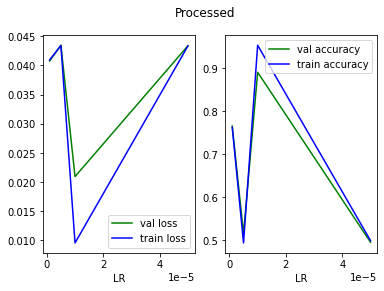

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Processed')
ax1.plot(LRrate_processed, val_loss_processed,'g',LRrate_processed,train_loss_processed,'b')
ax1.legend(['val loss','train loss'])
ax1.set_xlabel('LR')
ax2.plot(LRrate_processed,val_accuracy_processed,'g',LRrate_processed,train_accuracy_processed,'b')
ax2.legend(['val accuracy','train accuracy'])
ax2.set_xlabel('LR')

Text(0.5, 0, 'LR')

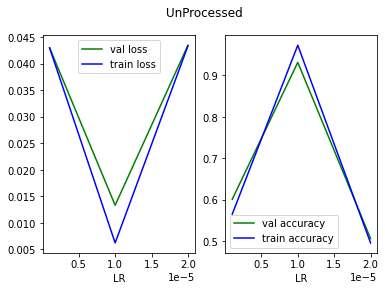

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('UnProcessed')
ax1.plot(LRrate_unprocessed, val_loss_unprocessed,'g',LRrate_unprocessed,train_loss_unprocessed,'b')
ax1.legend(['val loss','train loss'])
ax1.set_xlabel('LR')
ax2.plot(LRrate_unprocessed,val_accuracy_unprocessed,'g',LRrate_unprocessed,train_accuracy_unprocessed,'b')
ax2.legend(['val accuracy','train accuracy'])
ax2.set_xlabel('LR')




## Evaluation & Report

### Functions

In [ ]:
def modeling(y_test_eval, y_pred_eval):

    """
    CM = | TN FP |
         | FN TP |
    """      
    cm = confusion_matrix(y_test_eval, y_pred_eval)
    model_test_accuracy = accuracy_score(y_test_eval, y_pred_eval)
    # train_accuracy = accuracy_score(y_train, y_pred_eval_train)

    # train_score = clf.score(x_train, y_train)
    # test_score = clf.score(x_test,y_test_eval)

    # precision = (TP) / (TP + FP)
    precision = (cm[1][1]) / (cm[1][1] + cm[0][1])

    # sensitivity = (TP) / (TP + FN)
    sensitivity = (cm[1][1]) / (cm[1][1] + cm[1][0])

    # specificity = (TN) / (TN + FP)
    specificity = (cm[0][0]) / (cm[0][0] + cm[0][1])

    # f1_score = 2 * (precision * recall) / (precision + recall)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    results_format(model_test_accuracy, precision, sensitivity, specificity,
                   f1_score,
                   cm, train_accuracy, y_pred_eval, y_test_eval)    
def results_format(model_test_accuracy, precision, sensitivity, specificity,
                   f1_score, cm, train_accuracy, y_pred_eval, y_test_eval):
    print("Confusion Matrix : ")
    print(cm)
    print(f"Precision = {round(precision, 6)}")
    print(f"Sensitivity = {round(sensitivity, 6)}")
    print(f"Specificity = {round(specificity, 6)}")
    print(f"F score = {round(f1_score, 6)}")
    print("Report:\n",
      classification_report(y_test_eval, y_pred_eval))
    print("-------------------------------------------------------------------------------------")    
    print("-------------------------------------------------------------------------------------")

In [ ]:
def evaluate(model, x_test_data, y_test_data):

    test = Dataset(x_test_data, y_test_data)

    test_data = torch.utils.data.DataLoader(test, batch_size=16)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    y_pred = []

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_data:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)
              output = model(input_id, mask)
              
              output      = (output >0.5).float()
              y_pred.append(output.tolist())

              test_label  = test_label.unsqueeze(1)
              
              acc         = (output == test_label).sum().item()
              total_acc_test += acc


              # acc = (output.argmax(dim=1) == test_label).sum().item()
              # total_acc_test += acc
    y_pred = list(np.concatenate(y_pred). flat)
    modeling(y_test_data,y_pred)
    print(f'Test Accuracy: {total_acc_test / len(x_test_data): .3f}')
    return total_acc_test / len(x_test_data)

### Test

In [ ]:
test_model = torch.load('/content/drive/MyDrive/model_1e-05/model_1e-05.pth')
evaluate(test_model, x_test, y_test)

[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0,

In [ ]:
test_model_unprocessed = torch.load('/content/drive/MyDrive/Models/UnProcessed/UnProcessed_1e-05/model_1e-05.pth')
evaluate(test_model_unprocessed, x_test_preprocess, y_test_preprocess)

Confusion Matrix : 
[[4782  218]
 [ 183 4817]]
Precision = 0.956703
Sensitivity = 0.9634
Specificity = 0.9564
F score = 0.96004
Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      5000
           1       0.96      0.96      0.96      5000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Test Accuracy:  0.960


0.9599